# Project: Investigate a Dataset - [Database TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

## Research Question 1 :

Is there a relationship between the profit margin, which indicates the volume of sales and profit of selling the film, and the vote_average that the film obtained ?


## Research Question 2 :
is there a relationshep between year of release and vote_average?

## Research Question 3 :
is there a relationshep between year of release and popularity?

## Research Question 4 :
is there a relationshep between vote count and popularity?

## Research Question 5 :
is there a relationshep between vote average and popularity?

## Research Question 6 :
is there a relationshep between vote average and runtime ?

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling and Exploratory Data Analysis

In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.


In [9]:
# Loading data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
def x (df_name):
    
    return df_name.head(3)
    
x(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


exploring dataset info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

searshing for duplicated values

In [11]:
df.duplicated().sum()

1

dropping duplicated values

In [12]:
df.drop_duplicates(inplace = True)

checking again for duplicated values

In [13]:
df.duplicated().sum()

0

showing df histogram ...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec7c08198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec79e0588>]], dtype=object)

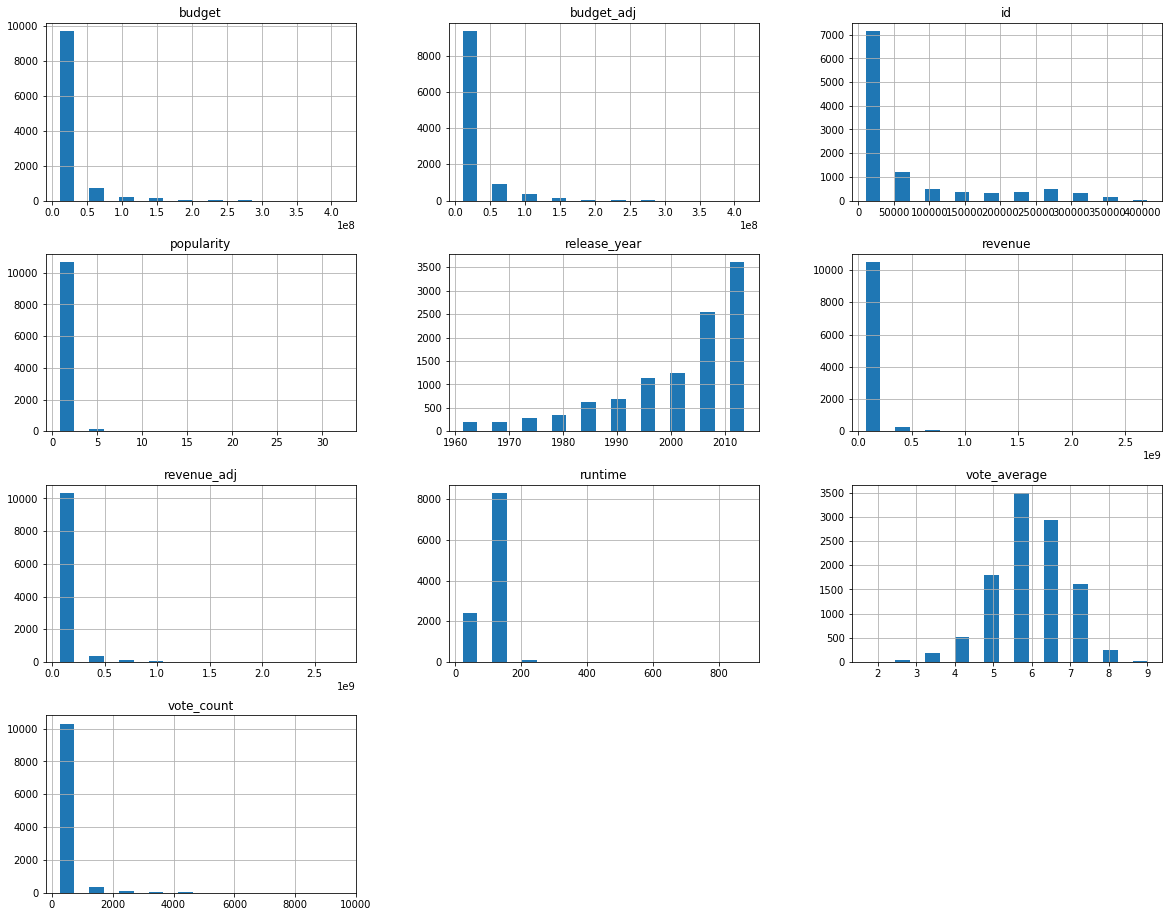

In [14]:
df.hist( grid=True, figsize=(20,16), rwidth=0.5)

dropping unnecessary rows

In [15]:
df.drop(['imdb_id','id','homepage','tagline','keywords','overview'],axis=1, inplace=True)

checking....and converting release_date to datetime

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.3+ MB


describing the  dataset

In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


looking for unique values

In [18]:
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

-there is no unique value that we can use it.
-showing dataset again to think about next step.

In [19]:
x(df)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


## Research Question 1 :

Is there a relationship between the profit margin, which indicates the volume of sales and profit of selling the film, and the vote_average that the film obtained ?

-We will add a new column to show the profit margin to investegate about it.

In [20]:
df['profit_margin_%'] = ((df['revenue']-df['budget'])/df['budget']) *100
x(df)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_margin_%
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,909.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,152.290903
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,168.398365


making scatter plot to show the relation with vote average

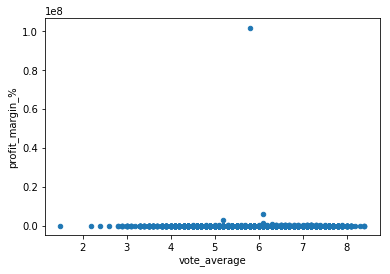

In [21]:
df.plot.scatter(x = 'vote_average', y = 'profit_margin_%');

we found outlieres , i will make a new df without it. i will suppose that outlieres are morethan ten times profit_margin

In [22]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_margin_%
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,6164.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,inf
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,NaN
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-100.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,-86.082479
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,89.831396
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,579.337709
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,inf


profit_margin has alot of nan , inf and outlieres , i will make a new df without it. i will suppose that profit_margin outlieres are morethan ten times revenues.

In [23]:
df_profit = df.loc[ df['profit_margin_%'] <= 1000 ]

checking...

In [24]:
df_profit.loc[df['profit_margin_%'] > 1000]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_margin_%


showing the new dataset shape

In [25]:
df_profit.shape

(4896, 16)

making scatter plot to show the relation with vote average after cleaning

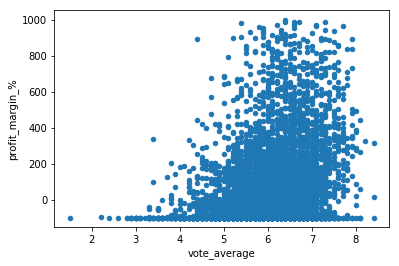

In [26]:
df_profit.plot.scatter(x = 'vote_average', y = 'profit_margin_%');

there are more outlieres , i will show dataset without zero values and less

In [27]:
df_profit = df_profit.loc[ df['profit_margin_%'] > 0 ]

In [28]:
df_profit.shape

(2505, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec76e95c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec75bd898>]], dtype=object)

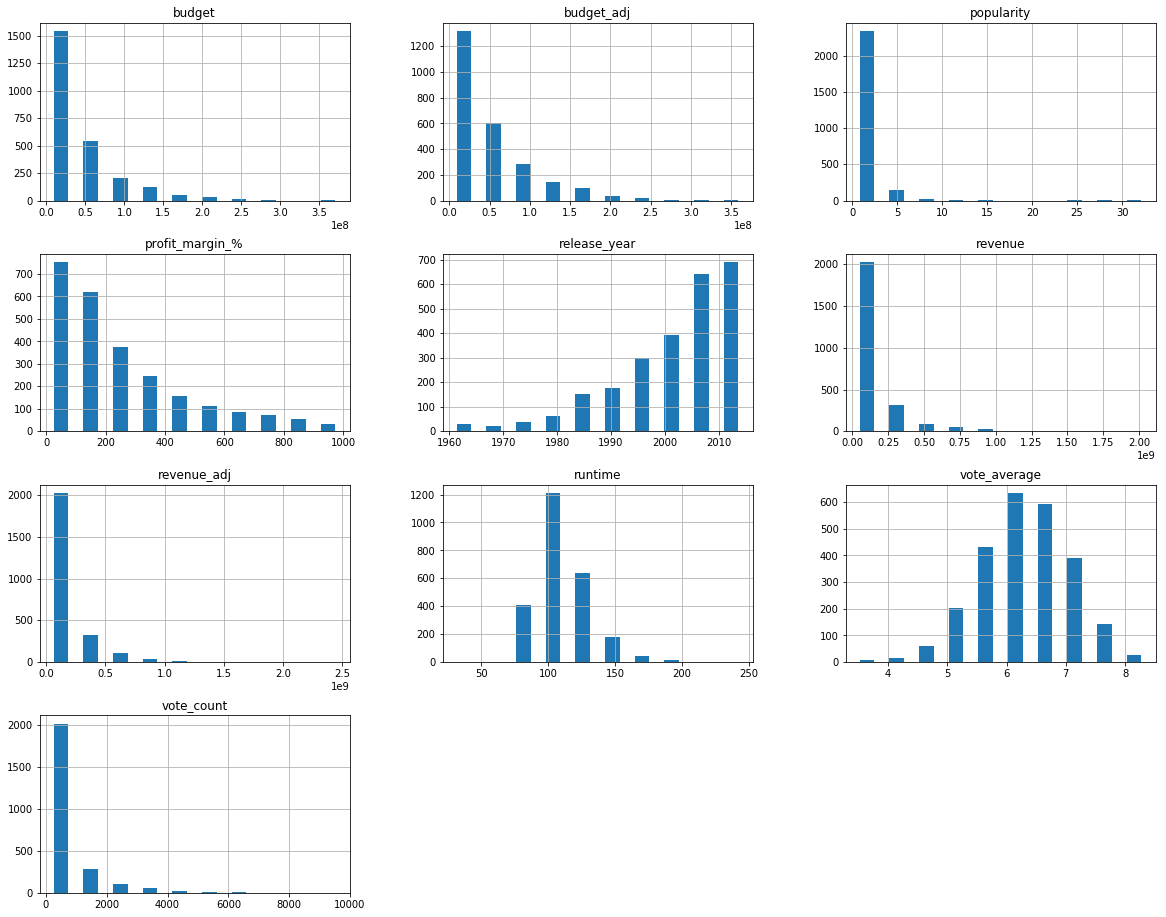

In [29]:
df_profit.hist( grid=True, figsize=(20,16), rwidth=0.5)

dataset histogram works after cleaning it.

making scatter plot again.

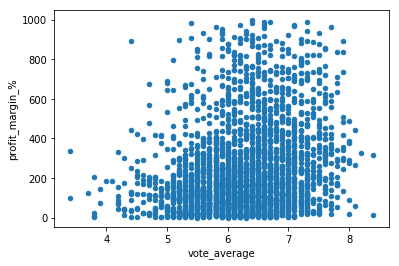

In [30]:
df_profit.plot.scatter(x = 'vote_average', y = 'profit_margin_%');

After deleting zero and illogical values the dataset become 2505 from 10865 rows it's about 23% of the original dataset , it's refere to movies which have revenue more than its budget have a good vote average between 5 and 7 .
This indicates that maybe there is a relationship between the profit margin, which indicates the volume of sales and profit of selling the film, and the vote average that the film obtained, after deleting outliers movies that have a outliers profit margin (means that budget or revenue equal zero or illogical values ).

i will go back to the df dataset to work on another indecator

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit_margin_%         6164 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 1.7+ MB


In [32]:
x(df)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_margin_%
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,909.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,152.290903
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,168.398365


## Research Question 2 :
is there a relationshep between year of release and vote_average

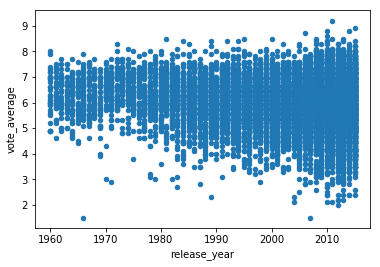

In [33]:
df.plot.scatter(x = 'release_year', y = 'vote_average');

old movies are better than the recent, the oldest have vote average between 5:8 , the recent are between 2:9

## Research Question 3 :
is there a relationshep between year of release and popularity

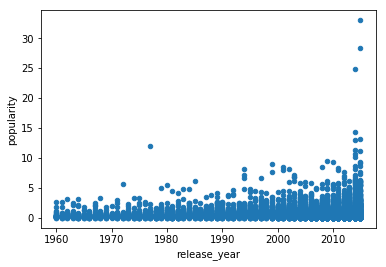

In [34]:
df.plot.scatter(x = 'release_year', y = 'popularity');

we found outlieres , i will make a new df without it. i will suppose that outlieres are morethan 5, i will check for it.

In [35]:
df.loc[ df['popularity'] > 5 ].shape

(85, 16)

In [36]:
df.popularity.describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

dropping outliers from dataset whith popularity > 5 by sellecting less than 5 

In [37]:
df_popularity = df.loc[ df['popularity'] <= 5 ]

describing new dataset

In [38]:
df_popularity.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_margin_%
count,10780.000000,1.078000e+04,1.078000e+04,10780.000000,10780.000000,10780.000000,10780.000000,1.078000e+04,1.078000e+04,6081.000000
mean,0.589146,1.386859e+07,3.539607e+07,101.868275,189.090074,5.965872,2001.261781,1.682359e+07,4.663579e+07,inf
std,0.655595,2.909711e+07,9.709585e+07,31.330879,449.981969,0.930783,12.821710,3.287962e+07,1.259352e+08,NaN
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-100.000000
25%,0.206627,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,-88.244867
50%,0.381360,0.000000e+00,0.000000e+00,99.000000,37.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,85.478285
75%,0.700983,1.500000e+07,2.248472e+07,111.000000,140.000000,6.600000,2011.000000,2.025573e+07,3.175450e+07,577.142908
max,4.983782,4.250000e+08,1.845034e+09,900.000000,7080.000000,9.200000,2015.000000,4.250000e+08,2.506406e+09,inf


making scatter to show the relationshep after cleaning

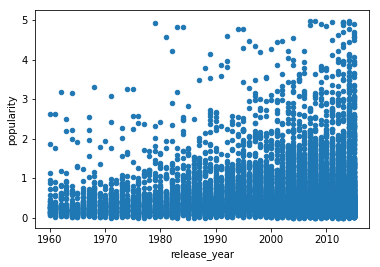

In [39]:
df_popularity.plot.scatter(x = 'release_year', y = 'popularity');

popularity is increasing year after year 

## Research Question 4 :
is there a relationshep between vote count and popularity

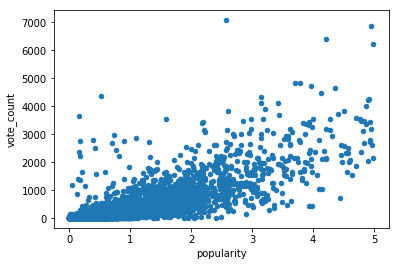

In [40]:
df_popularity.plot.scatter(y = 'vote_count', x = 'popularity');

the more high popularity the high vote count

## Research Question 5 :
is there a relationshep between vote average and popularity

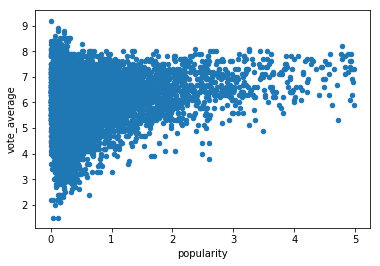

In [41]:
df_popularity.plot.scatter(y = 'vote_average', x = 'popularity');

The popularity of the movie affects its vote average, an increase in popularity increases its vote average 

## Research Question 6 :
is there a relationshep between vote average and runtime ?

In [42]:
df.runtime.describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

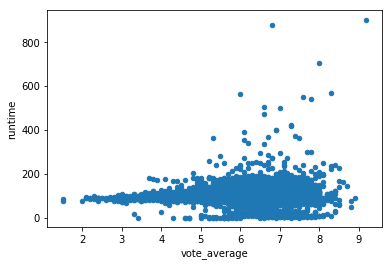

In [43]:
df_popularity.plot.scatter(x = 'vote_average', y = 'runtime');

In [44]:
df_popularity = df_popularity.loc[ df['runtime'] < 200 ]

In [45]:
df_popularity.shape

(10707, 16)

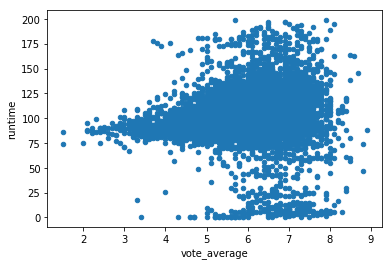

In [46]:
df_popularity.plot.scatter(x = 'vote_average', y = 'runtime');

There is a concentrate in the data in runtime between 70:150, and in the same area the major vote average between 5:8, This indicates that to get a good high vote average the runtime should be between 70:150.

<a id='conclusions'></a>
## Conclusions


- Movies which have revenue more than its budget have a good vote average between 5 and 7 . This indicates that there is a relationship between the profit margin ( which indicates the volume of sales and profit of selling the film) and the vote average that the film obtained.

- Old movies are better than the recent, the oldest have vote average between 5:8 , the recent are between 2:9

- Popularity is increasing year after year

- The more high popularity the high vote count

- The popularity of the movie affects its vote average, an increase in popularity increases its vote average

- There is a concentrate in the data in runtime between 70:150, and in the same area the major vote average between 5:8, This indicates that to get a good high vote average the runtime should be between 70:150.

## Limitations

- Profit_margin had alot of nan , inf and outlieres , I made a new df without it, I supposed that profit_margin outlieres are more than ten times revenues, I found more outlieres , i made df without zero values and less.

- After deleting zero and illogical values the dataset become 2505 from 10865 rows it's about 23% of the original dataset

- I found Popularity outlieres , i made a new df without it. i supposed that outlieres are morethan 5.

- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0